In [1]:
import numpy as np
import fiducial as fid
import matplotlib.pyplot as plt
import utils as u
import Eg_cov as egcov
import joint_cov as jp
import pyccl.nl_pt as pt

Get linear scale cuts (only considering nonlinear matter effects, no nonlinear galaxy bias).

Set up parameters etc

In [4]:
lens = 'DESI'
src = 'LSST'
Pimax=900.

endfilename='scalecuts_with_hartlap_Y10'

# Use the same cosmological parameters as Shadab's simulations:
h=0.69
OmB = 0.022/h**2

b1 = 2.33
#b2 = 0.9*(b1-1.0)**2-0.5 # From Fast-PT example notebook which says 
#'(this is a numerical fit to simulation k2Pnl1_regdata, but a relationship of this form is motivated in the spherical collapse picture'
#bs = -4.0/7.0*(b1-1.0) # The 'coevolution value' see Pandey et al. DES Y3 papers

# A_s designed to match sigma8 with other cosmological parameters
params = {'mu_0': 0., 'sigma_0':0., 'OmB':OmB, 'h':h, 'n_s':0.965, 'sigma8':0.82,'b':b1, 'OmM': 0.292, 'A_s':2.115 * 10**(-9)} 

#Nsamps=100000


In [5]:
rp0 = 1.5

rp_bin_c_raw = np.loadtxt('../data_for_Danielle/test-HOD-PB00-z0.75-w1pz_cat-zRSD-model-5-gxm-sel-crossparticles-wtag-w1-rfact10-bin1-wp-logrp-pi-NJN-100.txt.upsilon')[:,0]
rp_bin_edges_raw = u.rp_bin_edges_log(rp_bin_c_raw)
#Cut below rp0 making sure rp0 is in the lowest bin. Go one bin lower because this 
ind = next(j[0] for j in enumerate(rp_bin_edges_raw) if j[1]>rp0)
rp_bin_c = rp_bin_c_raw[ind:][4:]
rp_bin_edges = rp_bin_edges_raw[ind:][4:]

print('rp bin c=', rp_bin_c)
print('rp bin edges=', rp_bin_edges)


rp bin c= [ 5.54793718  7.31360558  9.64120984 12.70958983 16.75450244 22.08673575 29.11598823 38.38234769 50.59778848 66.70087562 87.92887875]
rp bin edges= [  4.83205129   6.36988417   8.39714273  11.06958999  14.5925616   19.23674266  25.35896564  33.42962733  44.0688315   58.09403408  76.5828519  100.95586057]


Get data covariance matrices for E_G and the joint probes case.

In [6]:
#Dcov_jp = jp.get_joint_covariance(params, lens, src, rp_bin_edges, rp_bin_c, rp0, endfilename)
#np.savetxt('/home/danielle/Documents/CMU/Research/EG_comparison/txtfiles/Dcov_jp_'+endfilename+'.txt', Dcov_jp)
Dcov_jp_raw = np.loadtxt('../txtfiles/joint_covariance_rp0=1.5_Jul2025.dat')
#Dcov_jp_raw = np.loadtxt('../txtfiles/joint_covariance_rp0=1.5_Jul2025_LSSTY10.dat')

Dcov_jp = np.delete(np.delete(Dcov_jp_raw, [0,1,2,3,15,16,17,18], axis=0), [0,1,2,3,15,16,17,18], axis=1)

print(Dcov_jp.shape)

(23, 23)


In [9]:
#Nsamps = 10000
#Dcov_eg = egcov.get_egcov(Dcov_jp, params, rp_bin_edges, rp_bin_c, rp0, lens, src, Pimax, Nsamps, endfilename,)
#np.savetxt('../txtfiles/sims_egcov_myunits_wSN_Jan25_LSSTY10.txt', Dcov_eg)
Dcov_eg_raw = np.loadtxt('../txtfiles/eg_cov_Y1.dat')
#Dcov_eg_raw = np.loadtxt('../txtfiles/eg_cov_Y10.dat')

Dcov_eg = Dcov_eg_raw[4:,4:]

print(Dcov_eg.shape)

(11, 11)


Get the linear and nonlinear datavector for E_G

In [10]:
# Get linear datavector
data_lin_EG = fid.E_G(params, rp_bin_edges, rp0, lens, src, Pimax, endfilename, nonlin=False)
# Get nonlinear datavector
data_nl_EG = fid.E_G(params, rp_bin_edges, rp0, lens, src, Pimax, endfilename, nonlin=True, nl_bias=False)

getting Upgg
getting Upgm
maxchi= 6669.353003473356
getting Upgg
getting Upgm
maxchi= 6669.353003473356


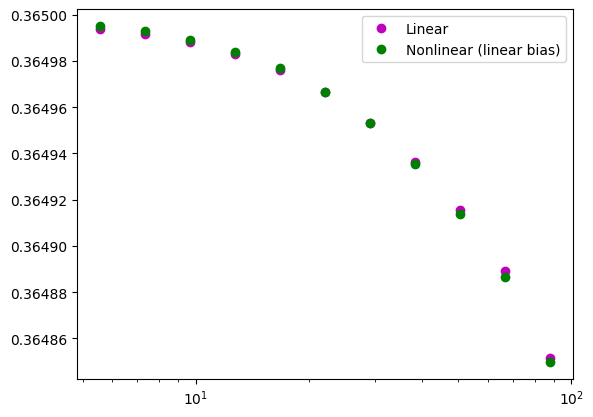

In [11]:
plt.figure()
plt.semilogx(rp_bin_c, data_lin_EG, 'mo', label='Linear')
plt.semilogx(rp_bin_c, data_nl_EG, 'go', label='Nonlinear (linear bias)')
plt.legend()
plt.show()

Get scale cuts for Eg

In [12]:
cut_inds_Eg = u.linear_scale_cuts_hartlap(data_nl_EG, data_lin_EG, Dcov_eg, rp_bin_c, covsamps = 100)

chi2_in= 7.670927241386499e-08 , no cuts


In [13]:
print("cut indices=", cut_inds_Eg)

cut indices= []


Now get the linear and nonlinear data vectors for the joint probes case

In [14]:
data_lin_jp = fid.jp_datavector(params, rp_bin_edges, rp0, lens,src, Pimax, endfilename, nonlin = False)
data_nl_jp = fid.jp_datavector(params, rp_bin_edges, rp0, lens,src, Pimax, endfilename, nonlin = True, nl_bias=False)

maxchi= 6669.353003473356
maxchi= 6669.353003473356


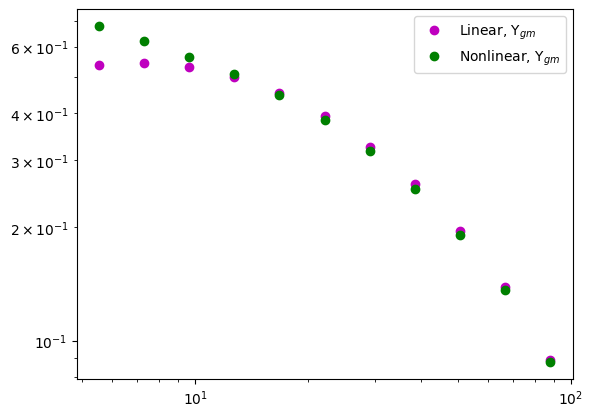

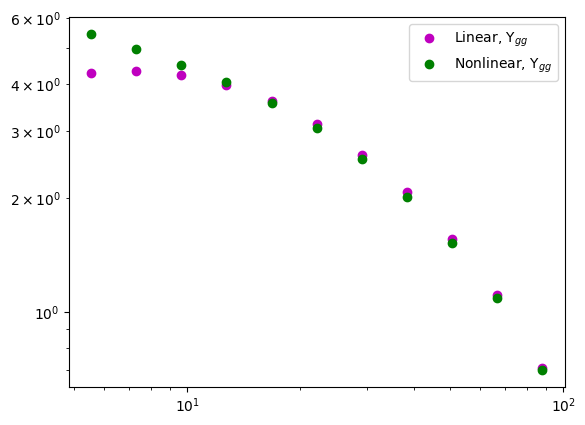

beta, lin= 0.34334818844012305
beta, nl= 0.34334818844012305


In [16]:
plt.figure()
plt.loglog(rp_bin_c, data_lin_jp[0:len(rp_bin_c)], 'mo', label='Linear, $\\Upsilon_{gm}$')
plt.loglog(rp_bin_c, data_nl_jp[0:len(rp_bin_c)], 'go', label='Nonlinear, $\\Upsilon_{gm}$')
plt.legend()
plt.show()

plt.figure()
plt.loglog(rp_bin_c, data_lin_jp[len(rp_bin_c):2*len(rp_bin_c)], 'mo', label='Linear, $\\Upsilon_{gg}$')
plt.loglog(rp_bin_c, data_nl_jp[len(rp_bin_c):2*len(rp_bin_c)], 'go', label='Nonlinear, $\\Upsilon_{gg}$')
plt.legend()
plt.show()

# Check that beta is the same in the linear or nonlinear case
print("beta, lin=", data_lin_jp[-1])
print("beta, nl=", data_nl_jp[-1])

In [15]:
cut_inds_jp = u.linear_scale_cuts_hartlap(data_nl_jp, data_lin_jp, Dcov_jp, rp_bin_c, covsamps=100)

chi2_temp= [239.75743457 289.43759224 296.64665217 296.79190983 296.62651034 296.83295626 296.95232998 296.97767054 296.9815295  296.98167424 296.98161266 193.52098157 289.00945132 296.9583619  296.33195155 296.53417129 296.91660487 296.98122238
 296.98208166 296.98211931 296.98213194 296.98205902 296.98214199]
ind_min= 11
chi2_temp= [117.06999065 188.20049155 195.88260459 195.78738411 195.65515888 195.90752403 196.03693724 196.06282925 196.06666574 196.06684598 196.06665168 156.07908048 195.49998484 195.68377709 195.64874636 195.9978077  196.06611955 196.06726091
 196.06727981 196.06729569 196.06727557 196.06731027]
ind_min= 0
chi2_temp= [ 91.86043776 117.48111272 118.5067641  118.25557359 118.43498727 118.55877303 118.58570976 118.58977659 118.58988217 118.58993118  72.96749591 118.13071453 118.11463793 118.11438545 118.51345516 118.58910677 118.59032537 118.59035454
 118.5903669  118.59030119 118.59038014]
ind_min= 10
chi2_temp= [33.39484962 72.75563203 73.73336294 73.49539541 73.73

In [16]:
print("cut indices=", cut_inds_jp)

cut indices= [0, 1, 2, 3, 5, 6, 7, 11, 12, 13, 14, 16, 17, 18]


For joint probes, we disect this to find the elements to cut for individual probes.

In [17]:
cut_indices_gm = [ind for ind in cut_inds_jp if ind<len(rp_bin_c)]
ind_keep_gm = [ind for ind in range(0,len(rp_bin_c)) if ind not in cut_indices_gm]
rp_keep_gm = rp_bin_c[ind_keep_gm]
Ups_keep_gm = data_nl_jp[ind_keep_gm]
print(zip(rp_keep_gm, Ups_keep_gm))

cut_indices_gg = [(ind-len(rp_bin_c)) for ind in cut_inds_jp if ind>=len(rp_bin_c)]
ind_keep_gg = [ind for ind in range(0,len(rp_bin_c)) if ind not in cut_indices_gg]
ind_keep_gg_dvec = [ind+len(rp_bin_c) for ind in range(0,len(rp_bin_c)) if ind not in cut_indices_gg]
rp_keep_gg = rp_bin_c[ind_keep_gg]
Ups_keep_gg = data_nl_jp[ind_keep_gg_dvec]
print(zip(rp_keep_gg, Ups_keep_gg))

ind_keep_Eg = [ind for ind in range(0,len(rp_bin_c)) if ind not in cut_inds_Eg]
rp_keep_Eg = rp_bin_c[ind_keep_Eg]
Eg_keep = data_nl_EG[ind_keep_Eg]

Plot the data points this tells us to keep for joint probes (not many)

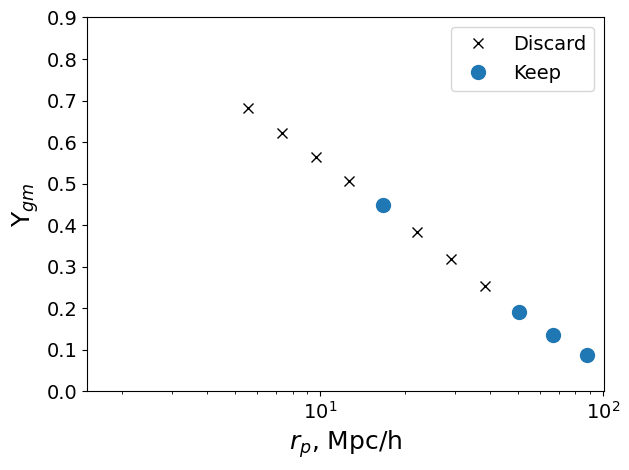

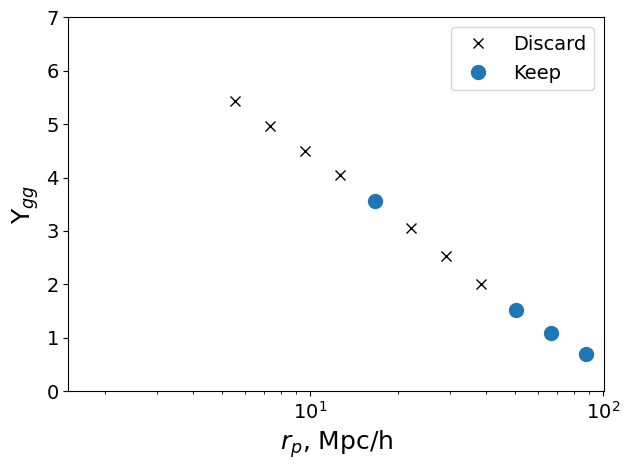

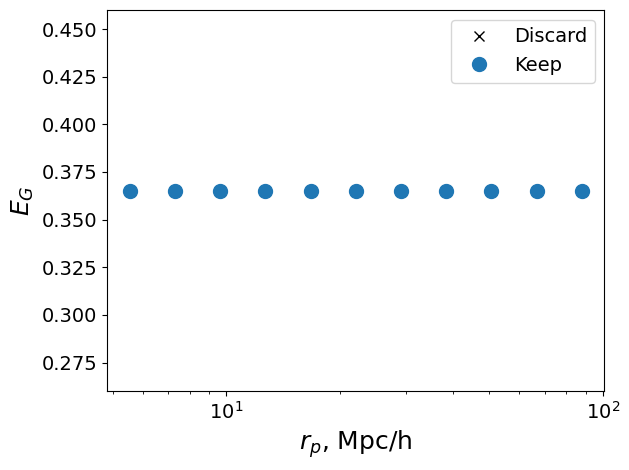

In [18]:
plt.figure()
plt.semilogx(rp_bin_c, data_nl_jp[0:len(rp_bin_c)], 'kx', markersize='7',label='Discard')
plt.semilogx(rp_keep_gm, Ups_keep_gm, 'o', markersize='10', label='Keep')
plt.ylabel('$\\Upsilon_{gm}$',fontsize=18)
plt.xlabel('$r_p$, Mpc/h', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.xlim(rp0, rp_bin_edges[-1])
plt.ylim(0, 0.9)
plt.tight_layout()
#plt.savefig('../plots/Upsilon_gm_linearscales_wHartlap.pdf')
plt.show()

plt.figure()
plt.semilogx(rp_bin_c, data_nl_jp[len(rp_bin_c):2*len(rp_bin_c)], 'kx', markersize='7',label='Discard')
plt.semilogx(rp_keep_gg, Ups_keep_gg, 'o', markersize='10', label='Keep')
plt.ylabel('$\\Upsilon_{gg}$',fontsize=18)
plt.xlabel('$r_p$, Mpc/h',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.xlim(rp0, rp_bin_edges[-1])
plt.ylim(0, 7)
plt.tight_layout()
#plt.savefig('../plots/Upsilon_gg_linearscales_wHartlap.pdf')
plt.show()
#plt.savefig('../plots/Upsilon_gg_scales.png')

plt.figure()
plt.semilogx(rp_bin_c, data_nl_EG, 'kx', markersize='7',label='Discard')
plt.semilogx(rp_keep_Eg, Eg_keep, 'o', markersize='10',label='Keep')
plt.ylabel('$E_G$',fontsize=18)
plt.xlabel('$r_p$, Mpc/h',fontsize=18)
plt.ylim(0.26,0.46)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
#plt.savefig('../plots/EG_linearscales_wHartlap.pdf')
#plt.show()

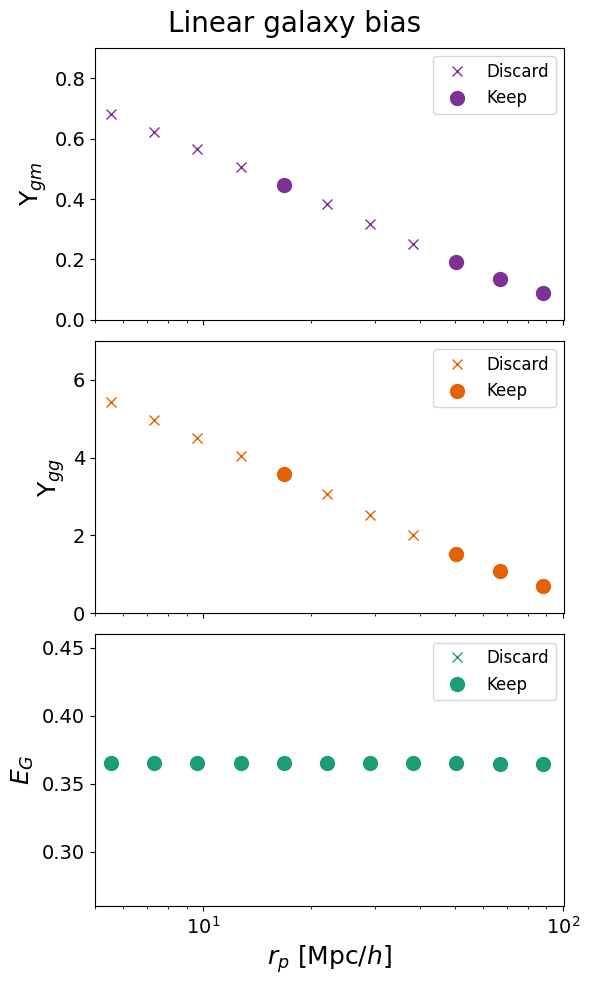

In [19]:
# Define colors
purple = '#7B3294'  # Upsilon_gm
orange = '#E66101'  # Upsilon_gg
teal   = '#1B9E77'  # E_G


fig, axes = plt.subplots(3, 1, figsize=(6, 10), sharex=True)

# --- Panel 1: Upsilon_gm ---
axes[0].semilogx(rp_bin_c, data_nl_jp[0:len(rp_bin_c)], 'x', color=purple, markersize=7, label='Discard')
axes[0].semilogx(rp_keep_gm, Ups_keep_gm, 'o', color=purple, markersize=10, label='Keep')
axes[0].set_ylabel(r'$\Upsilon_{gm}$', fontsize=18)
axes[0].legend(fontsize=12)
axes[0].tick_params(labelsize=14)
axes[0].set_xlim(5, rp_bin_edges[-1])
axes[0].set_ylim(0, 0.9)

# --- Panel 2: Upsilon_gg ---
axes[1].semilogx(rp_bin_c, data_nl_jp[len(rp_bin_c):2*len(rp_bin_c)], 'x', color=orange, markersize=7, label='Discard')
axes[1].semilogx(rp_keep_gg, Ups_keep_gg, 'o', color=orange, markersize=10, label='Keep')
axes[1].set_ylabel(r'$\Upsilon_{gg}$', fontsize=18)
axes[1].legend(fontsize=12)
axes[1].tick_params(labelsize=14)
axes[1].set_xlim(5, rp_bin_edges[-1])
axes[1].set_ylim(0, 7)

# --- Panel 3: E_G ---
axes[2].semilogx(rp_bin_c, data_nl_EG, 'x', color=teal, markersize=7, label='Discard')
axes[2].semilogx(rp_keep_Eg, Eg_keep, 'o', color=teal, markersize=10, label='Keep')
axes[2].set_ylabel(r'$E_G$', fontsize=18)
axes[2].set_xlabel(r'$r_p$ [Mpc$/h$]', fontsize=18)
axes[2].legend(fontsize=12)
axes[2].tick_params(labelsize=14)
axes[2].set_xlim(5, rp_bin_edges[-1])
axes[2].set_ylim(0.26, 0.46)

# --- Overall Title ---
fig.suptitle('Linear galaxy bias', fontsize=20, y=0.98)

plt.tight_layout(h_pad=0.7)
plt.savefig('../plots/linear_bias_linear_cuts_GR_rpgte5.pdf')
plt.show()

In [18]:
print(rp_bin_c)

[ 1.83709466  2.42176242  3.19250463  4.20854074  5.54793718  7.31360558  9.64120984 12.70958983 16.75450244 22.08673575 29.11598823 38.38234769 50.59778848 66.70087562 87.92887875]


In [17]:
# Check if the v1 version of the scale cuts actually does give a chi2<=1 when doing the cut more properly.

cut_EG_cov = np.delete(np.delete(Dcov_eg, cut_inds_Eg,axis=0),cut_inds_Eg,axis=1)
cut_EG_invcov = np.linalg.pinv(cut_EG_cov)
print('cut_EG_invcov=', cut_EG_invcov)
Eg_keep_lin = data_lin_EG[ind_keep_Eg]
delta_keep = Eg_keep - Eg_keep_lin
print('delta keep=', delta_keep)

chi2_eg_proper = np.dot(delta_keep, np.dot(cut_EG_invcov, delta_keep))
print('chi2 with v1 cut=', chi2_eg_proper)

cut_EG_invcov= [[ 2.67187768e+02 -3.56378426e+02 -2.83181475e+02 -2.26973120e+02 -1.54621446e+02 -4.04953208e+01  3.89890577e+01  1.04317393e+02  3.53323121e+01  1.55877952e+01 -1.56776119e+01  2.86572509e+01  6.19762319e+01 -3.45154418e+01
   3.38113758e+01]
 [-3.56378426e+02  2.52695091e+03 -1.04740117e+03 -6.82000714e+02 -4.49595591e+02 -3.82113772e+02 -1.71272620e+02 -7.91341197e+01  1.19294182e+02  4.65858407e+00  8.94952984e+01 -4.38891779e+01  6.26028321e+01  5.71935512e+01
  -9.25914408e+01]
 [-2.83181475e+02 -1.04740117e+03  7.84017224e+03 -2.07181539e+03 -7.83945693e+02 -8.73201527e+02 -6.28027879e+02 -5.51955121e+02  3.08925427e+02 -1.58538768e+02  2.97888456e+02 -1.59166559e+02 -2.73046636e+02  4.19539666e+01
   2.76355863e+01]
 [-2.26973120e+02 -6.82000714e+02 -2.07181539e+03  1.64274471e+04 -4.59416475e+03 -1.72884950e+03 -1.06306317e+03 -8.99038627e+02 -2.02563874e+02 -2.82965436e+02 -3.36328052e+02  7.59040964e+00 -3.12650166e+02 -4.28016097e+01
  -1.00436175e+01]
 [-1.

Why does the nonlinear dip below the linear at intermediate scales? Edit: Figured this out, it's a physical feature due to the nonlinear impact from void growth at intermediate scales, see HMCode-2020 paper.

In [ ]:
wgg_lin = fid.wgg(params, rp_bin_c, lens, Pimax, endfilename, nonlin = False)
wgg_nonlin = fid.wgg(params, rp_bin_c, lens, Pimax, endfilename, nonlin = True)

In [ ]:
plt.figure()
plt.loglog(rp_bin_c, wgg_lin, 'mo', label='Linear, $w_{gg}$')
plt.loglog(rp_bin_c, wgg_nonlin, 'go', label='Nonlinear, $w_{gg}$')
plt.legend()
plt.savefig('../plots/wgg_lin_vs_nonlin_1000_Pimax200.pdf')
plt.show()

In [ ]:
k_lin, Pkgg_lin = np.loadtxt('../txtfiles/Pkgg_nonlin=False.dat', unpack=True)
k_nl, Pkgg_nl = np.loadtxt('../txtfiles/Pkgg_nonlin=True.dat', unpack=True)

In [ ]:
plt.figure()
plt.loglog(k_lin, Pkgg_lin, 'm', label='Linear$')
plt.loglog(k_nl, Pkgg_nl, 'g', label='Nonlinear')
plt.xlim(10**(-3), 10**(-1))
plt.ylim(10**4, 5*10**5)
plt.legend()
#plt.savefig('../plots/wgg_lin_vs_nonlin_1000_Pimax200.pdf')
plt.show()

In [ ]:
plt.figure()
plt.semilogx(k_lin, Pkgg_nl/Pkgg_lin)
plt.ylim(0.9,1.1)
plt.show()